# State Energy Profiles 2

Michael Minn

26 March 2023

In [1]:
import geopandas

import matplotlib.pyplot as plt

states = geopandas.read_file("https://michaelminn.net/tutorials/data/2019-state-energy.geojson")

list(states.columns)

['ST',
 'Name',
 'GEOID',
 'AFFGEOID',
 'Square.Miles.Land',
 'Square.Miles.Water',
 'State.Name',
 'Population.MM',
 'Civilian.Labor.Force.MM',
 'GDP.B',
 'GDP.Per.Capita',
 'GDP.Manufacturing.MM',
 'Personal.Income.Per.Capita',
 'VMT.MM',
 'Farm.Land.MM.Acres',
 'Average.Temperature',
 'Precipitation.Annual',
 'Consumption.Coal.B.BTU',
 'Consumption.Jet.Fuel.B.BTU',
 'Consumption.Gasoline.B.BTU',
 'Consumption.Total.B.BTU',
 'Consumption.Per.Capita.MM.BTU',
 'Production.Coal.B.BTU',
 'Production.Gas.B.BTU',
 'Production.Oil.B.BTU',
 'Production.Renewable.B.BTU',
 'Production.Total.B.BTU',
 'Electricity.Interstate.Flow.GWH',
 'Electricity.Average.Cost',
 'Electricity.Consumption.GWH',
 'Electricity.Per.Capita.KWH',
 'Electricity.Hydro.GWH',
 'Electricity.Nuclear.GWH',
 'Electricity.Solar',
 'Electricity.Wind.GWH',
 'CO2.Total.MM.Tonnes',
 'CO2.Per.Capita.Tonnes',
 'Renewable.Standard.Type',
 'Renewable.Standard.Name',
 'Renewable.Standard.Year',
 'Senators.Party',
 'geometry']

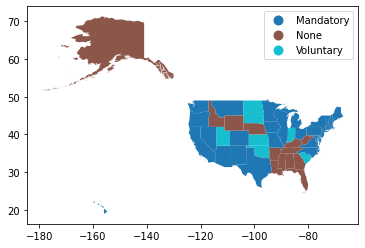

In [2]:
states.plot("Renewable.Standard.Type", legend=True)

plt.show()

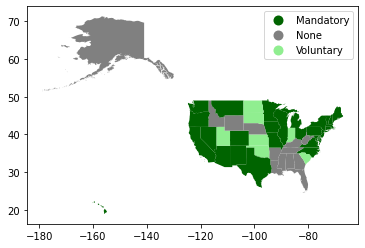

In [3]:
import matplotlib.colors as colors

green_cmap = colors.ListedColormap(['darkgreen', 'gray', 'lightgreen'])

states.plot("Renewable.Standard.Type", legend=True, cmap=green_cmap)

plt.show()

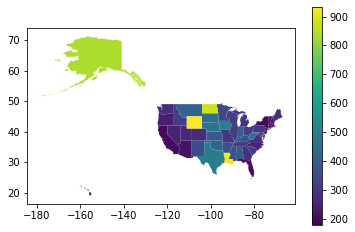

In [4]:
states.plot("Consumption.Per.Capita.MM.BTU", legend=True)

plt.show()

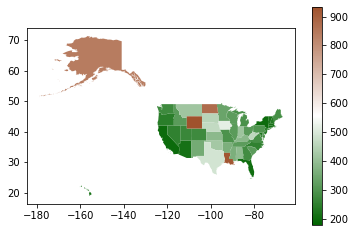

In [5]:
import matplotlib.colors as colors

brown_cmap = colors.LinearSegmentedColormap.from_list( \
        'brown_cmap', ['darkgreen', 'white', 'sienna'])

states.plot("Consumption.Per.Capita.MM.BTU", legend=True, cmap=brown_cmap)

plt.show()

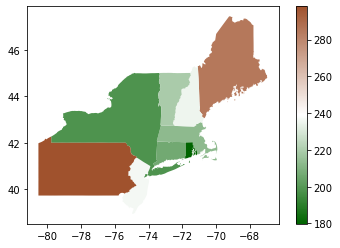

In [6]:
northeast = states[states.ST.isin( \
        ['ME', 'VT', 'NH', 'CT', 'RI', 'NY', 'NJ', 'MA', 'PA'])]

northeast.plot("Consumption.Per.Capita.MM.BTU", legend=True, cmap=brown_cmap)

plt.show()

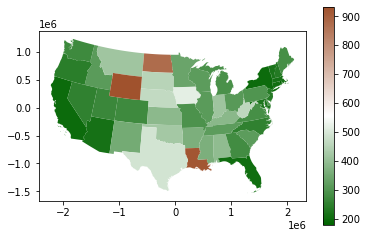

In [7]:
continental = states[~states.ST.isin(['AK', 'HI'])]

continental = continental.to_crs("ESRI:102009")

continental.plot("Consumption.Per.Capita.MM.BTU", legend=True, cmap=brown_cmap)

plt.show()

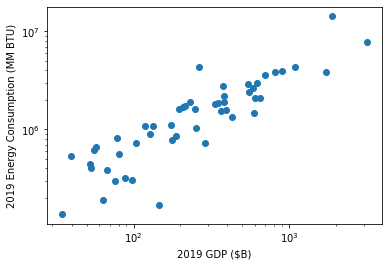

In [8]:
plt.scatter(states["GDP.B"], states["Consumption.Total.B.BTU"])
plt.ylabel("2019 Energy Consumption (MM BTU)")
plt.xlabel("2019 GDP ($B)")
plt.yscale("log")
plt.xscale("log")
plt.show()

In [9]:
import statsmodels.api as sm

y = states["Consumption.Total.B.BTU"]

x = states[["GDP.B"]]

model = sm.OLS(y, x, missing="drop").fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     Consumption.Total.B.BTU   R-squared (uncentered):                   0.783
Model:                                 OLS   Adj. R-squared (uncentered):              0.779
Method:                      Least Squares   F-statistic:                              180.7
Date:                     Tue, 04 Apr 2023   Prob (F-statistic):                    3.17e-18
Time:                             20:00:48   Log-Likelihood:                         -793.78
No. Observations:                       51   AIC:                                      1590.
Df Residuals:                           50   BIC:                                      1592.
Df Model:                                1                                                  
Covariance Type:                 nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
GDP.B       3867.6266    287.741     13.441      0.000    3289.682    4445.571
==============================================================================
Omnibus:                       37.546   Durbin-Watson:                   1.825
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              330.027
Skew:                           1.390   Prob(JB):                     2.17e-72
Kurtosis:                      15.148   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

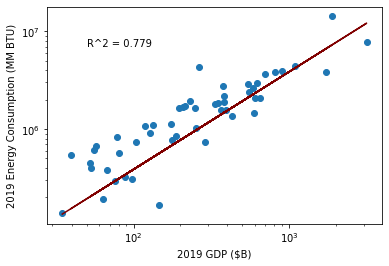

In [10]:
plt.scatter(states["GDP.B"], states["Consumption.Total.B.BTU"])

y_model = model.predict(x)

plt.plot(x, y_model, color="maroon")

plt.text(50, 7e6, "R^2 = " + str(round(model.rsquared_adj, 3)))
plt.ylabel("2019 Energy Consumption (MM BTU)")
plt.xlabel("2019 GDP ($B)")
plt.yscale("log")
plt.xscale("log")

plt.show()